In [1]:
import os

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt


import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


/Users/alexanderorlov/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#import data (Yellow Taxi June 2015) from http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml
name = 'yellow_tripdata_2015-06.csv'
df = pd.read_csv(name)
%time

CPU times: user 3 µs, sys: 8 µs, total: 11 µs
Wall time: 27.2 µs


In [3]:
#12.3 million data points for June
df.shape

(12324935, 19)

In [4]:
#What does the data frame look like?
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0,0.5,0.00,0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0,0.5,1.00,0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0,0.5,2.20,0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0,0.5,2.86,0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0,0.5,0.00,0,0.3,10.30


In [ ]:
#clean column names
df.rename(columns={
        'tpep_pickup_datetime' : 'pickup_datetime',
        'tpep_dropoff_datetime' : 'dropoff_datetime'
    }, inplace=True)

In [ ]:
#convert pickup and dropoff to date objects
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
#calculate trip length
df['trip_time_hours'] = df['dropoff_datetime'] - df['pickup_datetime']
df['trip_time_seconds'] = df['trip_time_hours'].map(lambda x:x.astype('timedelta64[s]'))

In [24]:
#calculate average speed
df['avg_speed'] = df['trip_distance']/(df['trip_time_hours'])/np.timedelta64(1,'h'))
max(df['avg_speed'])

TypeError: ufunc true_divide cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [14]:
#Hour of pickup and dropoff
df['pickup_hour'] = df.pickup_datetime.map(lambda x:x.time().hour*3600 + x.time().minute*60 + x.time().second)
df['dropoff_hour'] = df.dropoff_datetime.map(lambda x:x.time().hour)

In [20]:
print len(df.pickup_hour)
print len(df.avg_speed)

12324935
12324935


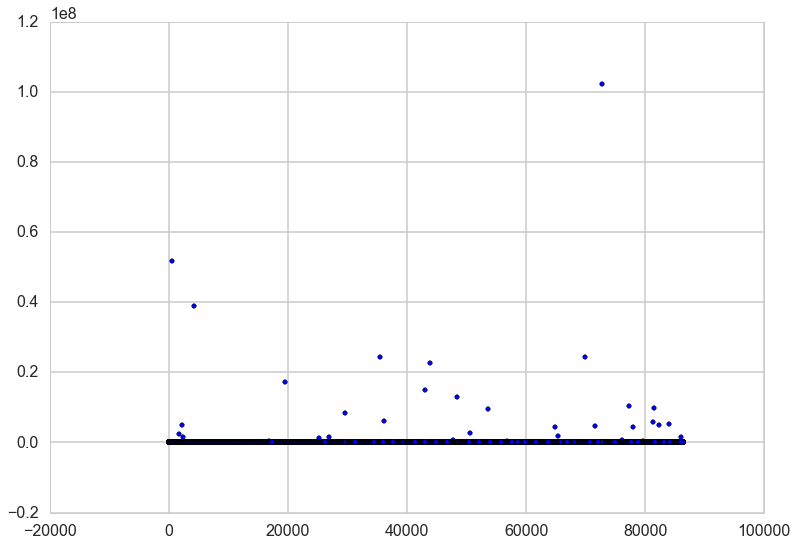

In [22]:
#Create an array of variables to plot against
plot_vars = ['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount', 'avg_speed']

#make a subplot for each variable
#for col in plot_vars:
    #plt.scatter(df['pickup_hour'], col);
plt.scatter(df.pickup_hour, df.avg_speed)
plt.show()

In [ ]:
#Create an array of variables to plot against
plot_vars = ['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'tip_amount', 'total_amount', 'avg_speed']

#create a 4x2 grid of plots.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13,30), tight_layout=True)
plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.subplots_adjust(hspace=.3)

pickup_hours = df['pickup_hour']

#make a subplot for each variable
for axis, col in zip(axes.ravel(), plot_vars):
    df.plot(kind='scatter', x='pickup_hour', y=col, ax=axis);
    #sns.regplot(x=pickup_minutes, y=col, data=df, scatter=True, fit_reg=True, ax=axis, label="Kristen is da shitt")
    
    axis.set_title("title")
    axis.set_xlabel("Time of Day")
    ylabel = col.replace("_",' ').title()
    axis.set_ylabel(ylabel)
    axis.grid(False)  
